# The Sparks Foundation

## GRIP(Graduate Rotational Internship Program) Feb-2023

## Author : Gaurav Bhagwan Patil


## Domain : Data Science & Business Analytics

### Task 2 :-  Prediction using Unsupervised Machine Learning

### Problem Statement :
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Importing all required libraries

In [2]:
import warnings as wg
wg.filterwarnings('ignore')

import pandas as pd
import numpy as np  

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import silhouette_score
from pylab import rcParams


## Reading in the data from the source

In [3]:
data=pd.read_csv("C:\\Users\\Expert\\Desktop\\Iris.csv")
print('Data imported Succesfully')

Data imported Succesfully


## Finding some properties of the data

In [4]:
data.head()                                                          #display the first(top) 5 rows


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.tail()                                                      #display the last 5 rows


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 6)

#### There are 150 rows and 6 columns.

In [27]:
data.columns                                                        #columns names of the data

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.isnull().sum()                                                  #Checking null values & Duplicates 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Here,there is no missing value present in dataset.

In [8]:
data.info()                                            #Info regarding the entir dataframe(Data types of each columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### All the datapoints are in Float except Species.

In [6]:
data.describe().T                                              #Displays statsticial information of dataset

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


#### This table helps us understand the range of values in each of the feature

## Dropping column

In [10]:
iris=pd.DataFrame(data)               #dropping Id column
iris_df=iris.drop(columns=["Id"])

print(iris_df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


## Checking for outliers

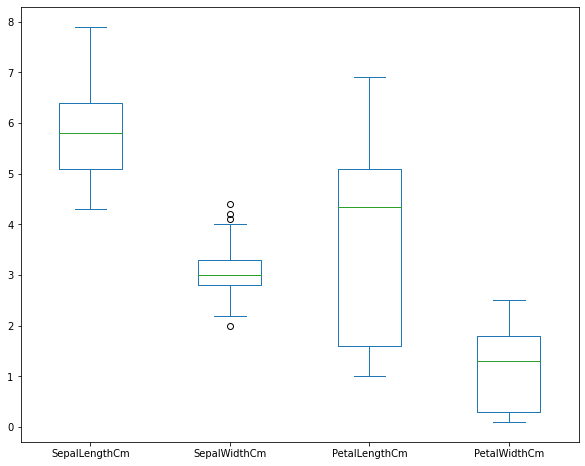

In [5]:
# Checking for outliers by boxplot

plt.rcParams["figure.figsize"]=(10,8)
iris_df.plot(kind="box")
plt.show()

#### Outliers present in this data thats dot are
#### The lower and upper level outlier wiil be replaced by the 5th and 95th percentile respectively.

#### Only Sepalwidth has some outliers. We now remove the outliers


## Removing the outliers using IQR method


In [6]:
Q1=iris_df.quantile(0.25)
Q3=iris_df.quantile(0.75)
IQR=Q3-Q1
iris_df=iris_df[~((iris_df<(Q1-1.5*IQR)) | (iris_df>(Q3+1.5*IQR))).any(axis=1)]


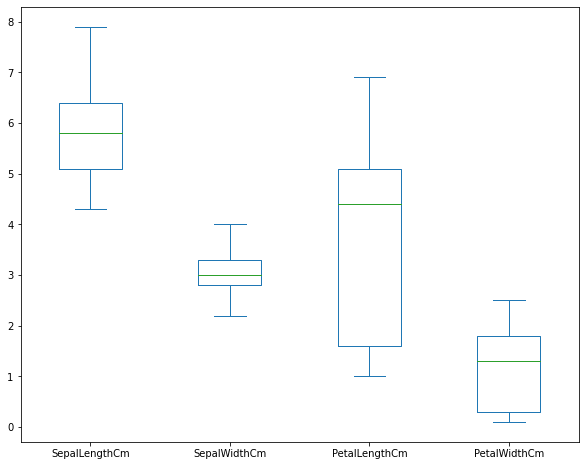

In [19]:
plt.rcParams["figure.figsize"]=(10,8)
iris_df.plot(kind="box")
plt.show()

#### Now our data is free from Outliers

## Correlation Matrix

<AxesSubplot:>

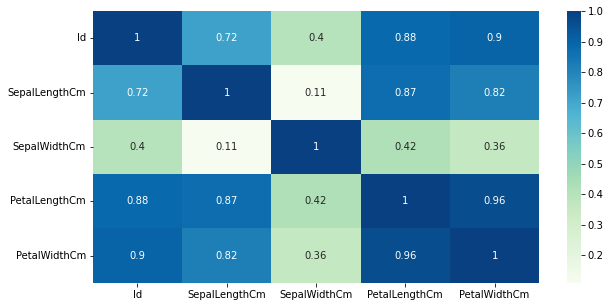

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()), cmap='GnBu', annot=True)

#### From the above heatmap, we can see that high correlation exists between the following:

#### A. Petal Length & Sepal Length
#### B. Petal Width & Sepal Length
#### C. Petal Width & Petal Length


# K-Means clustering

#### Let us perform the centroid-based clustering algorithm called K-Mean clustering. Here we perform the K-Mean clustering by using Elbow method

## Optimal value of K using Elbow plot

In [8]:
x=iris_df.iloc[:,[0,1,2,3]].values

In [9]:
from sklearn.cluster  import KMeans

wcss=[]
K=range(1,11)
for i in K:
    kmeans=KMeans(n_clusters=i,init='k-means++',
                 max_iter=300,n_init=10,random_state=0)
    kmeans=kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[655.0325342465754,
 143.860075,
 73.51656472013659,
 53.3048778073286,
 42.54863475177305,
 36.50818840579711,
 31.74186517347387,
 28.335926501035203,
 26.432709527949804,
 24.827200643559344]

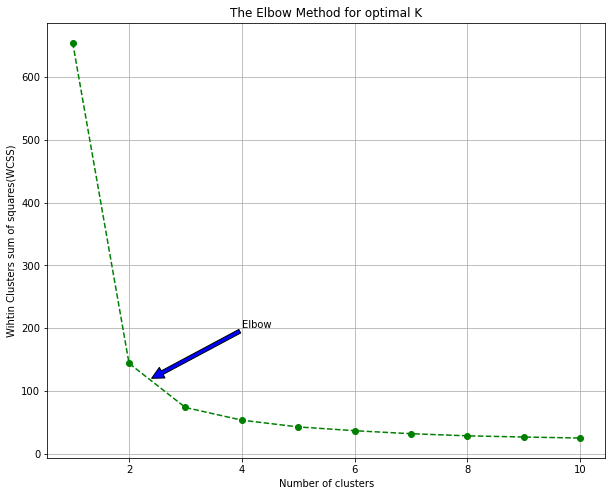

In [23]:
plt.plot(K,wcss,"go--")

plt.title("The Elbow Method for optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Wihtin Clusters sum of squares(WCSS)")
plt.annotate("Elbow",xytext=(4,200),xy=(2.4,120),arrowprops={"facecolor":"blue"})
plt.grid()
plt.show()

In the above plot, the Elbow point is represented by the arrow and the elbow occurs by 3 points Elbow plot is plotted with the value of k on the x-axis and the WCSS(Within Cluters Sum of Squares) on the y-axis.

Hence, the Elbow method shows that optimum value for k is 3.

## K Means Cluster Data Visualization

In [10]:
kmeans=KMeans(n_clusters=3, init='k-means++',
                max_iter=300,n_init=10,random_state=0)

y_kmeans=kmeans.fit_predict(x)

print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2 2 2 0 0
 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 0]


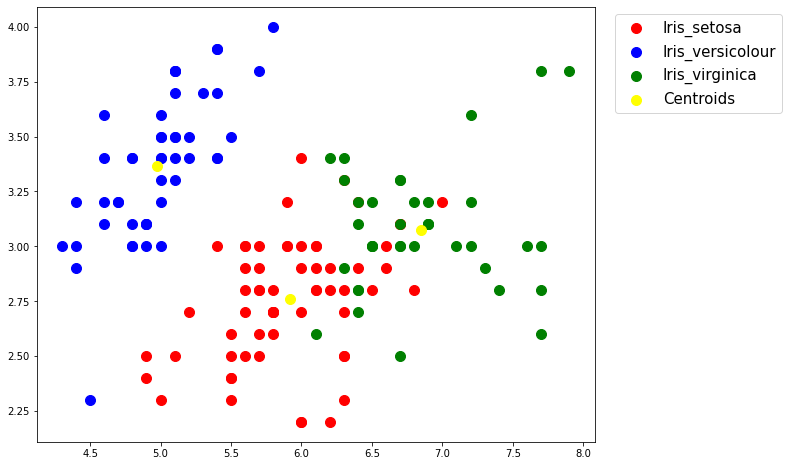

In [12]:
plt.scatter(x[y_kmeans == 0 ,0], x[y_kmeans==0,1], 
           s= 100 , c= "red" , label = "Iris_setosa")
plt.scatter(x[y_kmeans == 1 ,0], x[y_kmeans==1,1], 
           s= 100 , c= "blue" , label = "Iris_versicolour")
plt.scatter(x[y_kmeans == 2 ,0], x[y_kmeans==2,1], 
           s= 100 , c= "green" , label = "Iris_virginica")


# Plotting the centroids the clusters 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
           s= 100 , c= "yellow" , label = "Centroids")
 
plt.legend(loc=1,bbox_to_anchor=(1.35,1),prop={"size":15})
plt.show()

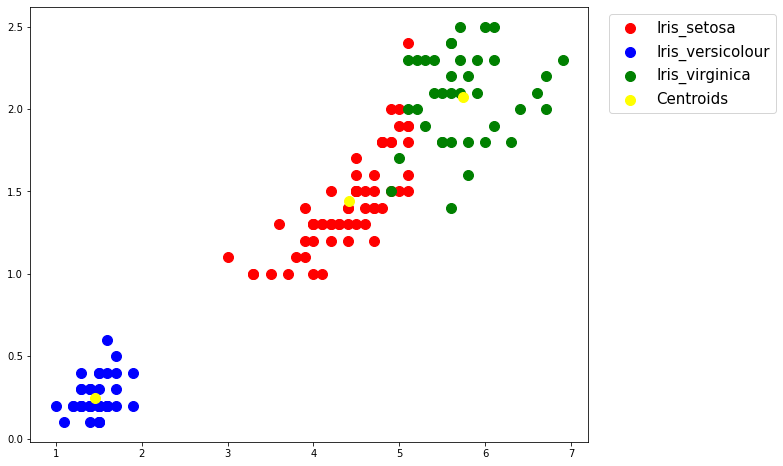

In [11]:
plt.scatter(x[y_kmeans == 0 ,2], x[y_kmeans==0,3], 
           s= 100 , c= "red" , label = "Iris_setosa")
plt.scatter(x[y_kmeans == 1 ,2], x[y_kmeans==1,3], 
           s=100 , c= "blue" , label = "Iris_versicolour")
plt.scatter(x[y_kmeans == 2 ,2], x[y_kmeans==2,3], 
           s= 100 , c= "green" , label = "Iris_virginica")


# Plotting the centroids the clusters 
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], 
           s= 100 , c= "yellow" , label = "Centroids")
 
plt.legend(loc=1,bbox_to_anchor=(1.35,1),prop={"size":15})
plt.show()

#### Thus, we have predicted the optimum number of clusters and represented it visually.

# Thank You...!!!